Logistic Regression using Numpy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [3]:
data = pd.read_csv('../data/gender_weight_height.csv')#,index_col='Index')
data["Gender"] = [1 if g == "Male" else 0 for g in data["Gender"]]
data.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [4]:
X = data[["Height", "Weight"]].values
y = data["Gender"].values

Logit model:
    $$\frac{1}{1 + e^{\vec{X}^T \vec{\beta}}}$$

In [15]:
def logit(X, betas):
    X = np.append([[1 for i in range(0,len(X))]], X.T, axis=0)
    return 1/(1 + np.exp(X.T @ betas))

Root Mean Square Error

$$rmse(\hat{y},y)=\sqrt{\frac{1}{n}\sum_{i}^{n}{(\hat{y}-y)}^2}$$

In [16]:
def rmse(y_hat, y):
    return np.sqrt(np.mean((y_hat - y)**2))

In [17]:
def bfgs_optimize(betas):
    yhat = logit(X, betas)
    return rmse(yhat, y)

In [18]:
betas = list(np.random.normal(0,.001,X.ndim+1))
n=len(X)
bfgs_optimize(betas)

0.5084210760977185

In [9]:
logit([X,y][0], betas)

array([0.59420696, 0.56679314, 0.58455745, ..., 0.55455985, 0.56735337,
       0.54921443])

In [10]:
res = minimize(bfgs_optimize,x0=betas)
res

      fun: 0.2494962938414937
 hess_inv: array([[ 2.91506327e+04, -6.22842010e+02,  7.55372552e+01],
       [-6.22842010e+02,  1.83963374e+01, -3.70374522e+00],
       [ 7.55372552e+01, -3.70374522e+00,  1.05494215e+00]])
      jac: array([3.72529030e-08, 2.19233334e-06, 5.17070293e-06])
  message: 'Optimization terminated successfully.'
     nfev: 175
      nit: 25
     njev: 35
   status: 0
  success: True
        x: array([-1.32902864,  0.53217622, -0.21055564])

In [107]:
betas = res.x

In [108]:
X.T[1]

array([241.89356318, 162.31047252, 212.74085556, ..., 128.47531878,
       163.85246135, 113.64910268])

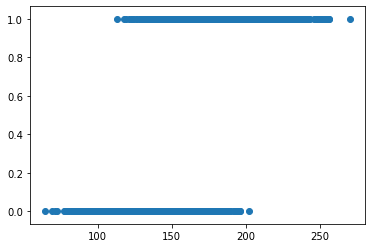

In [109]:
plt.scatter(X.T[1], y)

In [110]:
yhat = logit(X, betas)

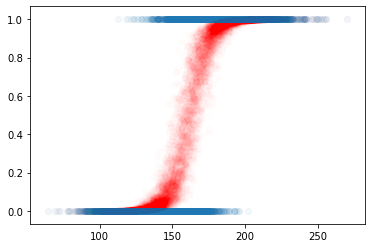

In [111]:
plt.scatter(X.T[1],yhat, alpha=0.01, c='red')
plt.scatter(X.T[1],y, alpha=0.05)

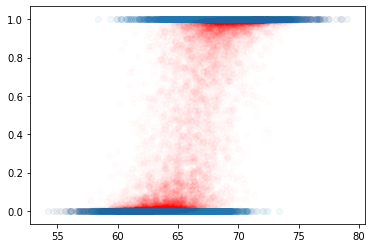

In [112]:
plt.scatter(X.T[0],yhat, alpha=0.01, c='red')
plt.scatter(X.T[0],y, alpha=0.05)